# Covid-19 elaborazione regione (Veneto)

Librerie importate

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Definizione della funzione logistica
\begin{equation}
f(x)=\frac{a}{1+b e^{-c x}}
\end{equation}

In [2]:
def logistica(x, a, b, c):
    return a / (1 + b * np.exp(-c * x))

La data del file in formato ISO viene codificata nella forma italiana per l'inserimento nel grafico finale

In [3]:
# modificare questa data mantenendone il formato
dataISO = '20200601'
# modificare eventualmente il nome del file
nomeFile = 'datiRegionali' + dataISO
# utilizzata nel grafico finale
codificaItaliana = dataISO[6:] + '-' + dataISO[4:6] + '-' + dataISO[:4]

Viene aperto e letto il file json dei dati regionali assegnandone i valori all'array ydata e in corrisponednza si definisce il numero dei giorni trascorsi dal 24 di febbraio.

In [4]:
with open(nomeFile + '.json') as f:
    dati = json.load(f)

# modificare, eventualmente, la regione
ydata = []
for elemento in dati:
    if elemento['denominazione_regione'] == "Veneto":
        ydata.append(elemento['totale_casi'])

ydata = np.array(ydata)
numGiorni = len(ydata)
xdata = np.linspace(1, numGiorni, numGiorni)

In base al modello logistico si esegue il fit non lineare e quindi i valori formattati vanno a costituire la label per il grafico finale.

In [5]:
param, covarianza = curve_fit(logistica, xdata, ydata)
labs = 'fit: a = %5.2f,\nb = %5.2f, c = %5.2f' % tuple(param)

Istruzioni per creare il grafico

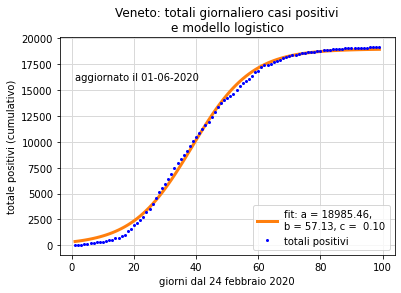

In [6]:
# predispone la figura e il grafico dei singoli dati
fig, ax = plt.subplots()
# grafico della curva derivata
plt.plot(xdata, logistica(
    xdata, param[0], param[1], param[2]), 'C1', linewidth=3., label=labs)
# grafico dei dati
ax.plot(xdata, ydata, 'ob', markersize=2, label='totali positivi')
ax.set_title('Veneto: totali giornaliero casi positivi\ne modello logistico')
ax.set_xlabel('giorni dal 24 febbraio 2020')
ax.set_ylabel('totale positivi (cumulativo)')
ax.grid(color='.85', linestyle='-', linewidth=1)
ax.text(1, 16000, 'aggiornato il ' + codificaItaliana)

plt.legend(loc='lower right')
plt.show()